In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data ##

In [3]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis ##

Analyze the independent variables one by one.

In [5]:
def eda_bar_plots(feature: str, target: str = 'Survived') -> None:
    """
    The given 'feature' is expected to be a categorical feature.
    Avoid calling this function with 'feature' == 'Age' or 'Fare'
    
    This function crates 3 bar plots to perform a visual
    Data Exploration analysis of the given 'feature'.
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    
    # (1) the distribution of 'feature' in the Training data
    df1 = df_train[feature].value_counts(normalize=True) 
    df1 = df1.sort_index().reset_index()
    # Now df1 has the columns: feature and 'proportion'
    sns.barplot(data=df1, x=feature, y='proportion', ax=ax1)
    # Set the title, the xlabel, and the ylabel.
    ax1.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Training Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # distribution of the categories in 'feature'
    ax1.axhline(
        y=1/len(df1), color='green', alpha=0.4, linestyle='--'
    )
    
    # (2) the distribution of 'feature' in the Test data
    df2 = df_test[feature].value_counts(normalize=True) 
    df2 = df2.sort_index().reset_index()
    # Now df2 has the columns: feature and 'proportion'
    sns.barplot(data=df2, x=feature, y='proportion', ax=ax2)
    # Set the title, the xlabel, and the ylabel.
    ax2.set(
        xlabel=feature, 
        ylabel='% of each category', 
        title=feature + ': % value counts [Test Data]'
    )
    # Plot a horizontal line at the proportion of a balanced
    # distribution of the categories in 'feature'
    ax2.axhline(
        y=1/len(df2), color='green', alpha=0.4, linestyle='--'
    )
    
    # (3) the relationship between the 'target' and the 
    # categories of 'feature' in the training data
    df3 = df_train.groupby(feature, as_index=False).agg(
        {target: 'mean'}
    ).sort_values(by=feature)
    sns.barplot(x=feature, y=target, data=df3, ax=ax3)
    ax3.set(
        xlabel=feature,
        ylabel=f'% {target}', 
        title=f"{feature}: prob of '{target}'"
    )
    # Plot a horizontal line at the baseline prediction
    # probability: two classes -> prob=0.5
    ax3.axhline(
        y=0.5, color='green', alpha=0.4, linestyle='--'
    )

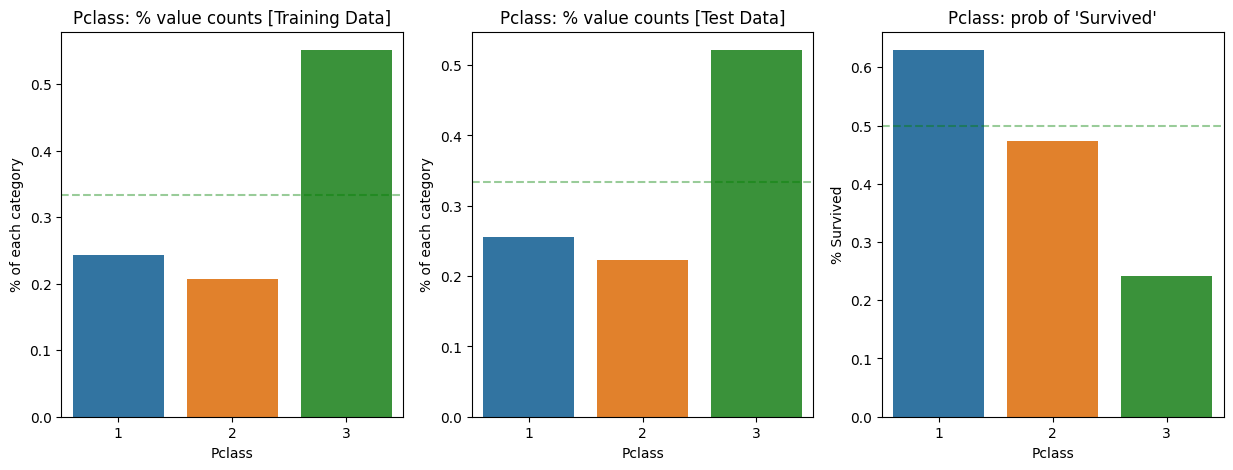

In [110]:
# pclass
eda_bar_plots(feature='Pclass')
# the higher your class, the more likely you are to survive

[Text(0.5, 1.0, "'Age' distribution")]

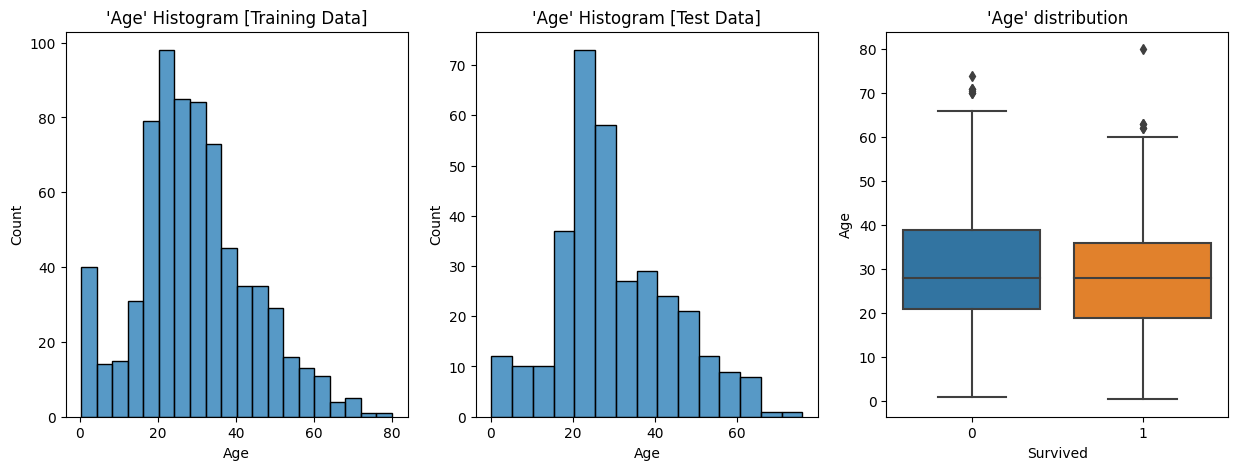

In [111]:
# Age
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(data=df_train, x='Age', ax=ax1)
ax1.set(title="'Age' Histogram [Training Data]") 
sns.histplot(data=df_test, x='Age', ax=ax2)
ax2.set(title="'Age' Histogram [Test Data]") 
sns.boxplot(
    data=df_train, x='Survived', y='Age', ax=ax3
)
ax3.set(title="'Age' distribution")

# In the testing set, more than 100 records have missing values for the 'Age' feature, which constitutes a 
# relatively high proportion. 

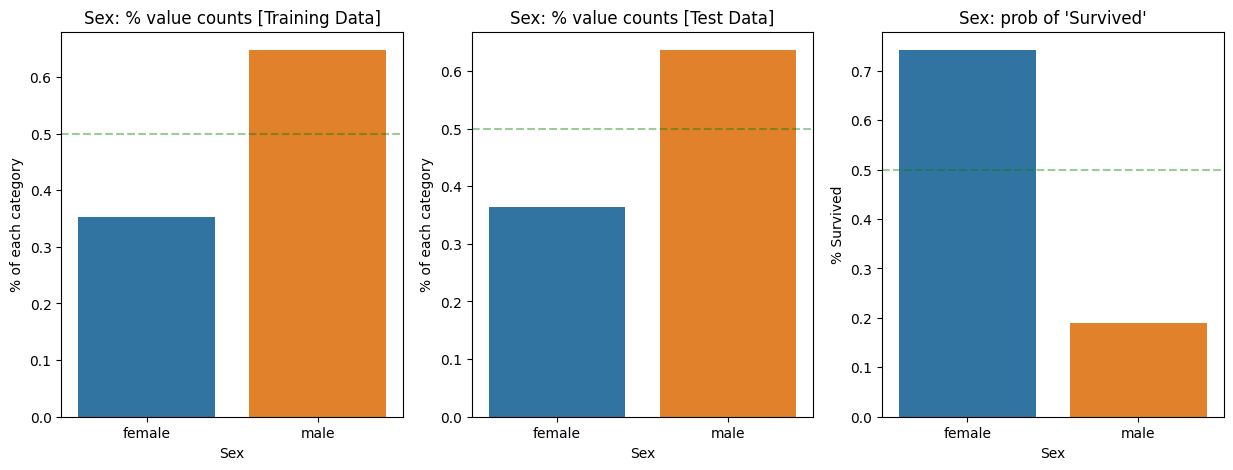

In [112]:
# Sex
eda_bar_plots(feature='Sex')
# The gender proportions are similar
# between the training and test sets, but there is a significant gender disparity among survivors.

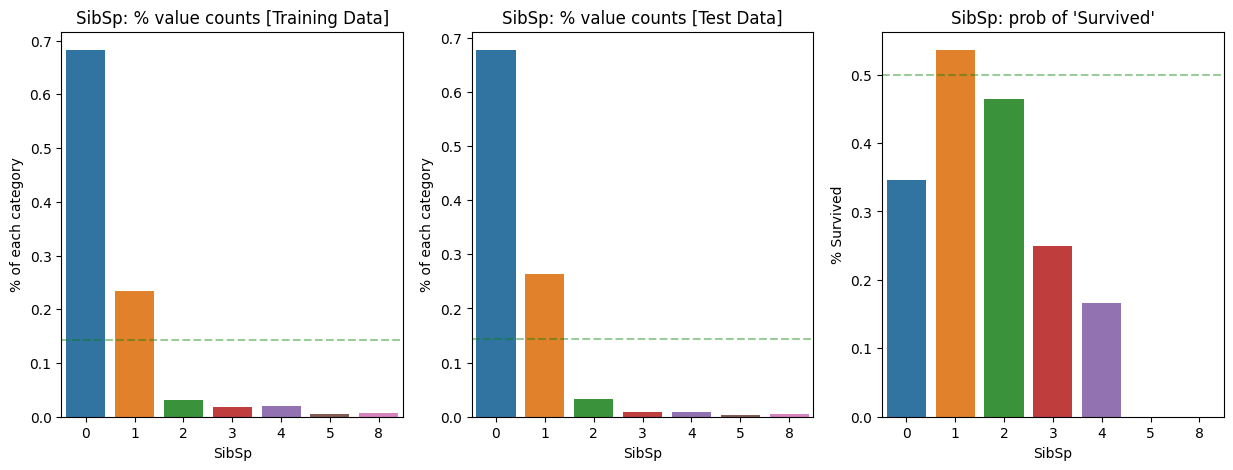

In [113]:
# SibSp
eda_bar_plots(feature='SibSp')
# 68% of the values are 0, 23% are 1, and the remaining 9% are 2, 3, 4, 5, 8.
# We will group this variable into three different groups: 0, 1, and >=2.

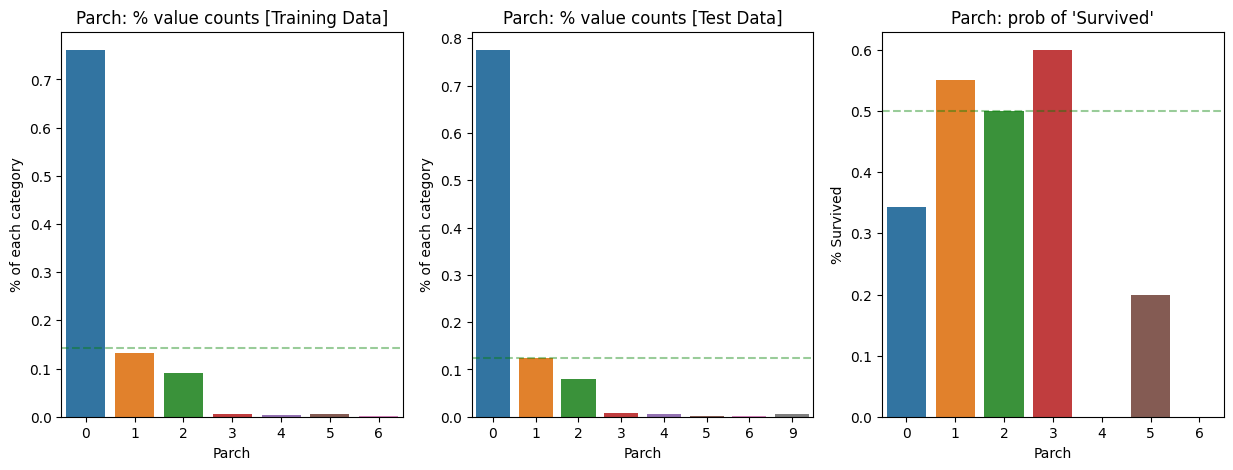

In [114]:
# Parch
eda_bar_plots(feature='Parch')
# We will group this variable into three different groups: 0, 1, and >=2.

[Text(0.5, 1.0, "'Fge' distribution")]

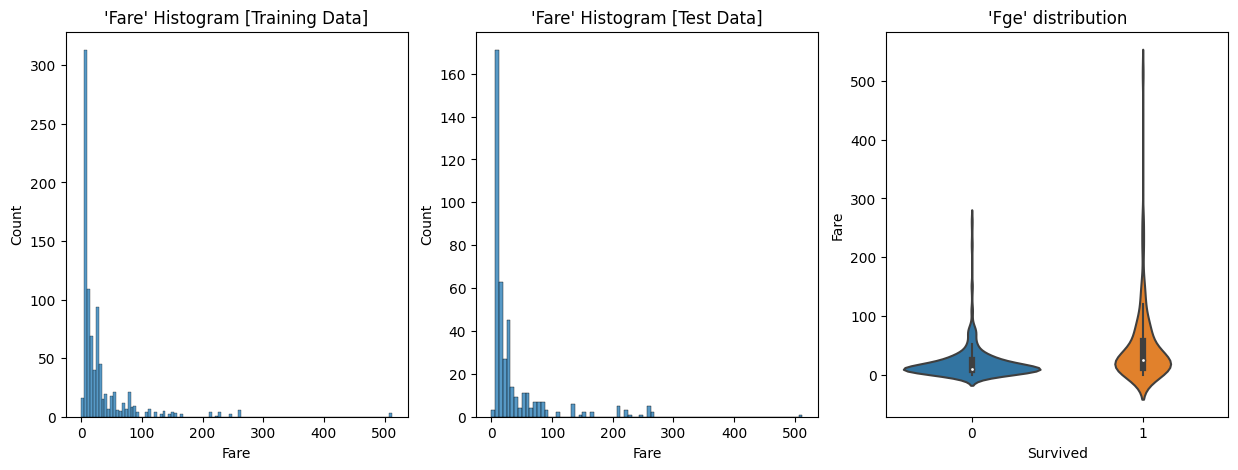

In [115]:
# 'Fare' before applying the transformation:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df_train, x='Fare', ax=ax1)
ax1.set(title="'Fare' Histogram [Training Data]")

sns.histplot(data=df_test, x='Fare', ax=ax2)
ax2.set(title="'Fare' Histogram [Test Data]") 

sns.violinplot(
    data=df_train, x='Survived', y='Fare', fill=False, ax=ax3
)
ax3.set(title="'Fge' distribution")

# We will set the maximum value to 300. Larger values will be cut to this new maximum.

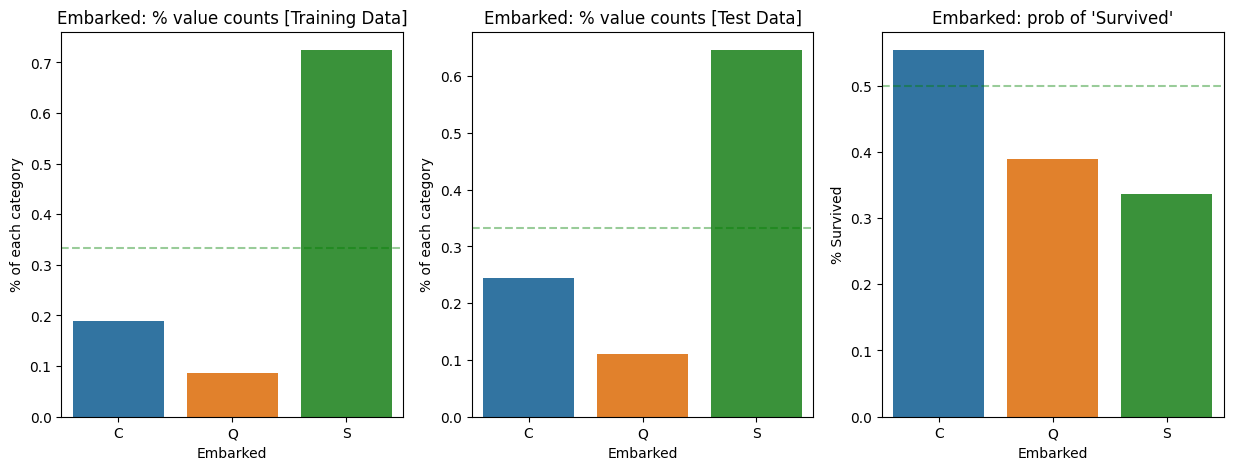

In [116]:
# Embarked
eda_bar_plots(feature='Embarked')

## Feature engineering ##

Let's append train and test sets together.

In [6]:
def get_combined_data():
    
    # extracting and then removing the targets from the training data
    targets = df_train['Survived']
    df_train.drop(['Survived'],axis=1,inplace=True)
    
    # merging train data and test data for future feature engineering
    combined = pd.concat([df_train, df_test],ignore_index = True)
    combined.reset_index(inplace=True)
    combined.drop(['index'], inplace=True, axis=1)
    
    return combined

combined = get_combined_data()

In [118]:
print(combined.shape)

(1309, 11)


### Name - Tittle ###

In [7]:
# Name
titles = set()
for name in combined['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

titles

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [8]:
# An example of 'Name': "Braund, Mr. Owen Harris"
# In this example, we want to extract 'Mr'
# The honorific title is preceded by a ', '
# and followed by a '.' 
combined['title'] = combined['Name'].map(
    lambda n: n.split('.')[0].split(', ')[-1]
)

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona" : "Mrs"
}

combined['mapped_title'] = combined['title'].map(Title_Dictionary)
print(combined[['Name', 'title', 'mapped_title']])

                                                   Name   title mapped_title
0                               Braund, Mr. Owen Harris      Mr           Mr
1     Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs          Mrs
2                                Heikkinen, Miss. Laina    Miss         Miss
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs          Mrs
4                              Allen, Mr. William Henry      Mr           Mr
...                                                 ...     ...          ...
1304                                 Spector, Mr. Woolf      Mr           Mr
1305                       Oliva y Ocana, Dona. Fermina    Dona          Mrs
1306                       Saether, Mr. Simon Sivertsen      Mr           Mr
1307                                Ware, Mr. Frederick      Mr           Mr
1308                           Peter, Master. Michael J  Master       Master

[1309 rows x 3 columns]


In [9]:
print(combined.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'mapped_title'],
      dtype='object')


### Age ###

In [10]:
print(combined['Age'].isnull().sum())

263


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

class AgeImputer(
    SimpleImputer, TransformerMixin
):
    """
    Age Imputer from 'mapped_title' column.
    
    There are six titles: Mr, Mrs, Miss, Master, Officer, Royalty.
    We proved that these groups have statistically different
    mean Ages (Independent T-tests).
    
    Imputation strategy:
        - fit:  compute the mean Age for each honorifit title
            Compute the mean Age for those who do not have title
        - transform:  if Age is missing for a passenger, if it has
            honorific title, the mean Age for that honorific title
            will be assigned. Else, the mean age for those who do
            not have title will be assigned.
    """
    
    def __init__(self) -> None:
        """
        Initialize an AgeImputer instance
        """
    
        # Initialize the parent Sklearn classes
        super().__init__()  
        # Define the mappig {title_: mean Age for title_}
        self.title2age = {}  
        # Define the mean age of those people with no title
        self.no_title_mean_age = None
        self.is_fitted = False
        
        
    def fit(self, X: pd.DataFrame, y=None):
        """
        Fits the 'title2age' and 'honorific_title' using 'X'.
        
        'X' is assumed to be Training Data (not Test Data!)
        'X' is assumed to be a non-empty data frame with
            (at least) the columns 'Age' and 'honorific_title'
        """
    
        df_groupby = combined.groupby(
            by='mapped_title'
        ).agg({'Age': 'mean'})
        self.title2age = df_groupby.to_dict()['Age']
        
        if X['mapped_title'].isna().sum() == 0:
            self.no_title_mean_age = X['Age'].mean()
        else:
            self.no_title_mean_age = X.loc[
                X['mapped_title'].isna(), 'Age'
            ].mean()
        self.is_fitted = True
        return self

    
    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """
        Transform 'X' by imputing the missing values of 'Age'
        
        'X' is assumed to be Training Data (not Test Data!)
        'X' is assumed to be a non-empty data frame with
            (at least) the columns 'Age' and 'honorific_title'
        """
        
        if not self.is_fitted:
            raise Exception("Call the 'fit' method first")
        
        X_out = X.copy(deep=True)
        missing_age_idx = X.loc[X['Age'].isna(), :].index
        age_col_idx = np.where(X.columns == 'Age')[0][0]
        
        for idx in missing_age_idx:
        
            # get the honorific_title of the 'idx' row
            title = X.loc[idx,'mapped_title']
        
            if title in self.title2age:
                X_out.loc[idx, 'Age'] = self.title2age[title]
            else:
                X_out.loc[idx, 'Age'] = self.no_title_mean_age
            
        return X_out['Age'].to_frame()

### Fare and Embarked ###

In [12]:
# Create three imputers, one for each feature having missing values
age_imputer = AgeImputer().set_output(transform='pandas')

fare_imputer = SimpleImputer(
    strategy='median'
).set_output(transform='pandas')

embarked_imputer = SimpleImputer(
    strategy='most_frequent'
).set_output(transform='pandas')

# Create a general imputer (for all the variables)
# with the three simple imputer
imputer = ColumnTransformer(
    transformers=[
        ('age_imp', age_imputer, ['Age', 'mapped_title']),
        ('fare_imp', fare_imputer, ['Fare']),
        ('embarked_imp', embarked_imputer, ['Embarked'])
    ],
    remainder='passthrough',  # do nothing on the other features
    verbose_feature_names_out=False
).set_output(transform='pandas')

In [13]:
# Assuming 'combined' is your DataFrame
transformed_data = imputer.fit_transform(combined[['Age', 'mapped_title', 'Fare', 'Embarked']])

# Create a DataFrame with the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=['Age', 'mapped_title', 'Fare', 'Embarked'])

In [14]:
combined[['Age', 'mapped_title', 'Fare', 'Embarked']] = transformed_df

In [15]:
combined['use_title'] = combined['title'].map(Title_Dictionary)
print(combined[['title', 'use_title']])

       title use_title
0         Mr        Mr
1        Mrs       Mrs
2       Miss      Miss
3        Mrs       Mrs
4         Mr        Mr
...      ...       ...
1304      Mr        Mr
1305    Dona       Mrs
1306      Mr        Mr
1307      Mr        Mr
1308  Master    Master

[1309 rows x 2 columns]


### family size ###

In [16]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return combined

In [17]:
combined = process_family()

print(combined.shape)

(1309, 18)


In [18]:
df_train = combined.iloc[:891]
df_test = combined.iloc[891:]

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      891 non-null    object 
 11  title         891 non-null    object 
 12  mapped_title  0 non-null      float64
 13  use_title     891 non-null    object 
 14  FamilySize    891 non-null    int64  
 15  Singleton     891 non-null    int64  
 16  SmallFamily   891 non-null    int64  
 17  LargeFamily   891 non-null    int64  
dtypes: float64(3), int64(8), objec

## start with sklearn ##

In [20]:
features = ["Pclass", "Sex", "Singleton","SmallFamily","LargeFamily", "Age", "use_title", "Fare", "Embarked"]

df_train["Pclass"] = df_train["Pclass"].astype("category")

df = pd.get_dummies(df_train[features])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Singleton          891 non-null    int64  
 1   SmallFamily        891 non-null    int64  
 2   LargeFamily        891 non-null    int64  
 3   Age                891 non-null    float64
 4   Fare               891 non-null    float64
 5   Pclass_1           891 non-null    bool   
 6   Pclass_2           891 non-null    bool   
 7   Pclass_3           891 non-null    bool   
 8   Sex_female         891 non-null    bool   
 9   Sex_male           891 non-null    bool   
 10  use_title_Master   891 non-null    bool   
 11  use_title_Miss     891 non-null    bool   
 12  use_title_Mr       891 non-null    bool   
 13  use_title_Mrs      891 non-null    bool   
 14  use_title_Officer  891 non-null    bool   
 15  use_title_Royalty  891 non-null    bool   
 16  Embarked_C         891 non

/tmp/ipykernel_42/3531936406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Pclass"] = df_train["Pclass"].astype("category")


In [21]:
df_final = df.drop(['Pclass_1', 'Sex_female', 'LargeFamily', 'use_title_Royalty', 'Embarked_C'], axis=1)

# double check the result
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Singleton          891 non-null    int64  
 1   SmallFamily        891 non-null    int64  
 2   Age                891 non-null    float64
 3   Fare               891 non-null    float64
 4   Pclass_2           891 non-null    bool   
 5   Pclass_3           891 non-null    bool   
 6   Sex_male           891 non-null    bool   
 7   use_title_Master   891 non-null    bool   
 8   use_title_Miss     891 non-null    bool   
 9   use_title_Mr       891 non-null    bool   
 10  use_title_Mrs      891 non-null    bool   
 11  use_title_Officer  891 non-null    bool   
 12  Embarked_Q         891 non-null    bool   
 13  Embarked_S         891 non-null    bool   
dtypes: bool(10), float64(2), int64(2)
memory usage: 36.7 KB


In [134]:
features = ["Pclass", "Sex", "Singleton","SmallFamily","LargeFamily", "Age", "use_title", "Fare", "Embarked"]

df_test["Pclass"] = df_test["Pclass"].astype("category")

test = pd.get_dummies(df_test[features])
test.info()

test_final = test.drop(['Pclass_1', 'Sex_female', 'LargeFamily', 'Embarked_C'], axis=1)

# double check the result
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Singleton          418 non-null    int64  
 1   SmallFamily        418 non-null    int64  
 2   LargeFamily        418 non-null    int64  
 3   Age                418 non-null    float64
 4   Fare               418 non-null    float64
 5   Pclass_1           418 non-null    bool   
 6   Pclass_2           418 non-null    bool   
 7   Pclass_3           418 non-null    bool   
 8   Sex_female         418 non-null    bool   
 9   Sex_male           418 non-null    bool   
 10  use_title_Master   418 non-null    bool   
 11  use_title_Miss     418 non-null    bool   
 12  use_title_Mr       418 non-null    bool   
 13  use_title_Mrs      418 non-null    bool   
 14  use_title_Officer  418 non-null    bool   
 15  Embarked_C         418 non-null    bool   
 16  Embarked_Q         418 

/tmp/ipykernel_42/3862689270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Pclass"] = df_test["Pclass"].astype("category")


In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, validation_curve

train_x = df_final
test_x = test_final
train_y = pd.read_csv("/kaggle/input/titanic/train.csv")["Survived"]
# values of max_depth
hyperparameters = {'max_depth':[10,20,30,40,50]}

randomState_dt = 10000
dt = RandomForestClassifier(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10}
The best score is: 
0.822666499278137


In [136]:
reg_tree = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(train_x, train_y)

print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))

predictions = reg_tree.predict(test_x)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

R2 on the training data:
0.941638608305275
Your submission was successfully saved!
